<h3>Prerequisite for Collab</h3>

In [1]:
!pip install pyomo

In [2]:
!pip install highspy

In [3]:
!pip install pyscipopt

In [4]:
!pip install shapely

<h3>Prerequisite for Conda Installation</h3>

In [5]:
#On Mac Terminal: conda create -n optim_env python=3.10
#conda activate optim_env
#conda install -c conda-forge pyomo scip
#conda install -c conda-forge glpk     # Linear / MILP solver
#conda install -c conda-forge highs    # Linear / Quadratic solver
#conda install -c conda-forge ipopt    # Nonlinear solver
#conda install -c conda-forge scip     # MINLP solver
#conda install networkx
#conda install conda-forge::matplotlib

# **I. Network Analysis**

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import time

# Step 1: Create graph
G2 = nx.Graph()

# Step 2: Define node data with BOTH position and label
# Each entry: node_id: {"pos": (x, y), "label": "..."}
node_data = {
    1:  {"pos": (-4.559058, 15.174809), "label": "Route de Matadi (border Kinshasa)"},
    2:  {"pos": (-4.442848, 15.255100), "label": "Triangle Matadi Kibala"},
    3:  {"pos": (-4.406924, 15.256513), "label": "UPN"},
    4:  {"pos": (-4.349325, 15.238810), "label": "Av. de l'École – Binza"},
    5:  {"pos": (-4.328773, 15.252333), "label": "Mont Ngaliema"},
    6:  {"pos": (-4.310907, 15.288488), "label": "Bd du 30 Juin"},
    7:  {"pos": (-4.299709, 15.319240), "label": "Gare Centrale"},
    8:  {"pos": (-4.398246, 15.276497), "label": "Selembao (Auto Stop)"},
    9:  {"pos": (-4.381511, 15.282728), "label": "Sanatorium"},
    10: {"pos": (-4.337062, 15.295951), "label": "Pierre Mulele"},
    11: {"pos": (-4.395099, 15.307741), "label": "Triangle Campus"},
    12: {"pos": (-4.389760, 15.314763), "label": "Rond Point Ngaba"},
    13: {"pos": (-4.336819, 15.326397), "label": "Av. de l'Université"},
    14: {"pos": (-4.331834, 15.314427), "label": "Bd Triomphal"},
    15: {"pos": (-4.393572, 15.333011), "label": "Lemba"},
    16: {"pos": (-4.375441, 15.344869), "label": "Échangeur 1"},
    17: {"pos": (-4.397829, 15.393514), "label": "Masina"},
    18: {"pos": (-4.405498, 15.423430), "label": "Av. Ndjoku"},
    19: {"pos": (-4.391380, 15.446782), "label": "Aéroport Ndjili"},
    20: {"pos": (-4.384103, 15.470908), "label": "Nsele"},
    21: {"pos": (-4.209434, 15.578420), "label": "RP Nsele"},
    22: {"pos": (-4.202280, 15.613246), "label": "Menkao"},
    23: {"pos": (-4.051282, 15.558907), "label": "Maluku"},
    # 23 intentionally omitted
    24: {"pos": (-4.472585, 15.281341), "label": "Arrêt Gare"},
    25: {"pos": (-4.420154, 15.307442), "label": "UNIKIN"},
    26: {"pos": (-4.461385, 15.288240), "label": "Kimwenza 2"},
    27: {"pos": (-4.484759, 15.219752), "label": "Benseke"},
    28: {"pos": (-4.447334, 15.249644), "label": "Wenze Matadi Kibala"},
    29: {"pos": (-4.329183, 15.337959), "label": "Limete PL"},
    30: {"pos": (-4.353936, 15.335540), "label": "Limete R"},
    
}

# Step 3: Add nodes with attributes
for node, attrs in node_data.items():
    G2.add_node(node, **attrs)  # adds both 'pos' and 'label'

# Step 4: Define edges with names
edges = [
    (1, 27, {"name": "Route de Matadi - Benseke"}),
    (27, 28, {"name": "Benseke - Wenze Matadi Kibala"}),
    (28, 2, {"name": "Wenze (Matadi Kibala) - Triangle (Cité Verte)"}),
    (2, 3, {"name": "Matadi Kibala - UPN"}),
    (3, 4, {"name": "UPN - Binza"}),
    (4, 5, {"name": "Binza - Mont Ngaliema"}),
    (5, 6, {"name": "Boulevard du 30 Juin"}),
    (6, 7, {"name": "24 - Gare Centrale"}),
    (3, 8, {"name": "UPN - Selembao"}),
    (8, 9, {"name": "Sanatorium - Université"}),
    (9, 10, {"name": "Sanatorium - Pierre Mulele"}),
    (10, 6, {"name": "24 Novembre"}),
    (2, 11, {"name": "Triangle (Cité Verte) - Triangle (Campus)"}),
    (11, 12, {"name": "Tr.Campus - RP Ngaba"}),
    (12, 13, {"name": "Av. Université"}),
    (10, 14, {"name": "B. Triomphal"}),
    (13, 14, {"name": "B. Sendwe"}),
    (12, 15, {"name": "RP Ngaba - Lemba"}),
    (15, 16, {"name": "Lemba - Echangeur 1"}),
    (13, 30, {"name": "Sendwe - Limete"}),
    (30, 16, {"name": "Limete. Lumumba 1"}),
    (16, 17, {"name": "Echangeur - Masina"}),
    (17, 18, {"name": "Masina - Av.Ndjoku (B.Lumumba 2)"}),
    (18, 19, {"name": "Av.Ndjoku - Int Aeroport (B.Lumumba 3)"}),#
    (19, 20, {"name": "Aeroport - Nsele"}),#
    (20, 21, {"name": "Nsele - RP. Nsele"}),#
    (21, 22, {"name": "RP.Nsele - Menkao"}),#
    (21, 23, {"name": "RP.Nsele - Maluku"}),#
    (2, 24, {"name": "Triangle Cité Verte - R. Kimwenza"}),#
    (11, 25, {"name": "Triangle Campus - Unikin"}),#
    (12, 25, {"name": "RP Ngaba - Unikin"}),#
    (25, 26, {"name": "Unikin - Kimwenza 2"}),#
    (7, 29, {"name": "Gare Centrale - Poids Lourd"}),#
    (29, 16, {"name": "Poids Lourd - Echangeur"}),#
]
G2.add_edges_from(edges)
G0 = G2.copy()

In [7]:
#(Distance) Calibration -------------------------------------
P1 = node_data[3]['pos']
P2 = node_data[27]['pos']
d = math.sqrt((P1[0]-P2[0])**2 + (P1[1]-P2[1])**2 )
True_d  = 4.2
calibration_score = d/True_d
print(d,calibration_score)
# ----------------------------------------------------------
# Edge lengths (Euclidean from node positions)
# ----------------------------------------------------------
def compute_edge_lengths(G):
    #pos = nx.get_node_attributes(G, 'pos')
    lengths = {}
    for (u, v) in G.edges(): 
        x1, y1 = node_data[u]['pos']
        x2, y2 = node_data[v]['pos']
        lengths[(u, v)] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return lengths

0.08607937236063044 0.02049508865729296


<h3>Problem Configuration</h3>

In [8]:
from joblib import load

demand_dict = load("../../data/od_demand.joblib")
print("Loaded", len(demand_dict), "OD pairs.")


Loaded 114 OD pairs.


In [9]:
#----- Complete Graph
Gc = nx.complete_graph(G0.nodes()) #complete graph
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
complete_edge_list = Gs.edges()
#---- System Configuration ----------------------
lengths = compute_edge_lengths(Gc)
cost_weights = {(i,j): lengths[i,j] for (i,j) in Gc.edges()}
CALIB = calibration_score
#-------- Demand Data ---------------------------
OD_pairs = demand_dict.keys() #[(1,27),(16,18),(5,7),(10,13)] #Origin Destination Pairs
demand_paths = demand_dict# {(1,27):25, (16,18):15, (5,7):15, (10,13):18}
Budget = 100 #100 Km
v_avg = 40;
travel_t0 = {(i,j):(cost_weights[i,j]/calibration_score)/v_avg for (i,j) in Gc.edges()}
travel_alpha = {(i,j):0.15 for (i,j) in Gc.edges()}
optim_free_design = False
#Optimisation settings
penalty_factor = 1e9
optim_max_iter = 1
optim_stall_iter = optim_max_iter
optim_pop_size = 20
#Number of runs
n_runs = 10

<h3>Analysis</h3>

In [10]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def draw_rotated_graph(
    G,
    degrees=-90,
    figsize=(10, 8),
    invert_x=True,
    edge_flows=None,
    scale=0.055,
    show_labels=True,
    node_size=120,
    spread=2.0,
    label_pos=0.55,
    node_font_size=6,
    edge_font_size=6
):

    def rotate_pos(pos_dict, degrees):
        theta = math.radians(degrees)
        cos_t, sin_t = math.cos(theta), math.sin(theta)
        return {
            n: (x * cos_t + y * sin_t, -x * sin_t + y * cos_t)
            for n, (x, y) in pos_dict.items()
        }

    # Get positions
    pos = nx.get_node_attributes(G, 'pos')
    if not pos:
        pos = nx.spring_layout(G, seed=42, k=1.0)

    pos_rotated = rotate_pos(pos, degrees)
    pos_scaled = {n: (x*spread, y*spread) for n, (x,y) in pos_rotated.items()}

    # Edge widths
    edge_widths = []
    for (u,v) in G.edges():
        flow = 0.0
        if edge_flows:
            flow = edge_flows.get((u, v), edge_flows.get((v, u), 0.0))
        edge_widths.append(max(0.5, flow * scale))

    # Edge color normalization
    edge_values = []
    if edge_flows:
        flow_vals = [
            edge_flows.get((u,v), edge_flows.get((v,u), 0.0))
            for (u,v) in G.edges()
        ]
        f_min, f_max = min(flow_vals), max(flow_vals)

        for (u,v) in G.edges():
            f = edge_flows.get((u,v), edge_flows.get((v,u), 0.0))
            norm_f = (f - f_min) / (f_max - f_min) if f_max > f_min else 0.0
            edge_values.append(norm_f)
    else:
        edge_values = "grey"

    # Plot
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos_scaled, node_size=node_size, node_color="lightblue")
    nx.draw_networkx_labels(G, pos_scaled, font_size=node_font_size, font_weight="bold")

    nx.draw_networkx_edges(
        G,
        pos_scaled,
        width=edge_widths,
        edge_color=edge_values,
        edge_cmap=plt.cm.RdYlGn_r,  # green=low, red=high
        arrows=G.is_directed()
    )

    if edge_flows and show_labels:
        edge_labels = {
            (u,v): f"{edge_flows.get((u,v), edge_flows.get((v,u), 0.0)):.2f}"
            for (u,v) in G.edges()
        }
        nx.draw_networkx_edge_labels(
            G,
            pos_scaled,
            edge_labels=edge_labels,
            font_size=edge_font_size,
            label_pos=label_pos,
            font_color="brown"
        )

    if invert_x:
        plt.gca().invert_xaxis()

    plt.axis("off")
    plt.show()


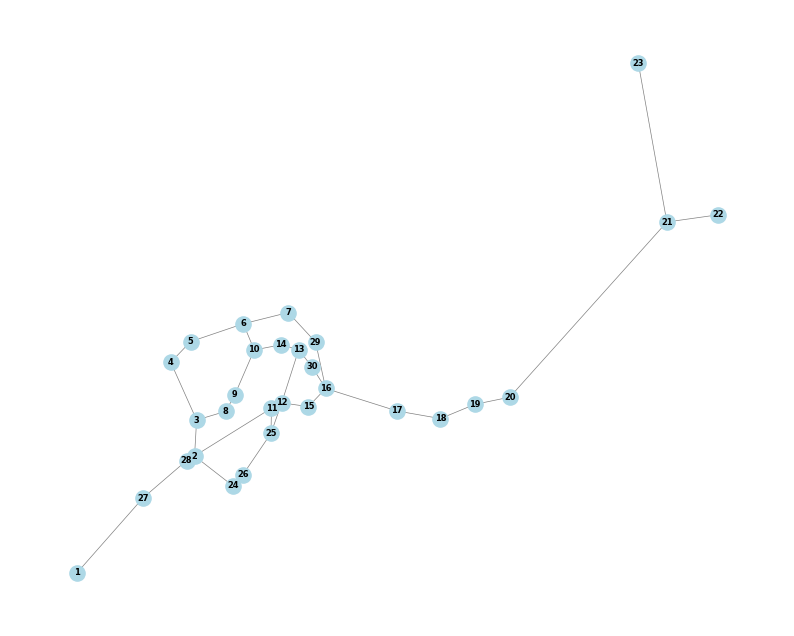

In [11]:
draw_rotated_graph(G2)

In [12]:
#Optimisation Preparation
import networkx as nx
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
print('[0] Initial Network:',G0, '\n[1] Complete Network:', Gc,'\n[2] Solution Network:',Gs)
#candidate solution
Gi = G0
def get_simple_paths(Gi, r, s):
  return list(nx.all_simple_paths(Gi,source=r,target=s))

[0] Initial Network: Graph with 30 nodes and 34 edges 
[1] Complete Network: Graph with 30 nodes and 435 edges 
[2] Solution Network: Graph with 30 nodes and 401 edges


In [13]:
def interior_intersection(A, B, C, D, eps=1e-9):
    r = (B[0]-A[0], B[1]-A[1])
    s = (D[0]-C[0], D[1]-C[1])
    AC = (C[0]-A[0], C[1]-A[1])

    rxs = r[0]*s[1] - r[1]*s[0]
    if abs(rxs) < eps:
        return False  # parallel or collinear

    t = (AC[0]*s[1] - AC[1]*s[0]) / rxs
    u = (AC[0]*r[1] - AC[1]*r[0]) / rxs

    # STRICT interior only
    return (eps < t < 1-eps) and (eps < u < 1-eps)


def count_intersections_basic(G, pos):
    edges = list(G.edges())
    n = len(edges)

    intersections = []
    count = 0

    for i in range(n):
        u1, v1 = edges[i]
        A = pos[u1]['pos']; B = pos[v1]['pos']

        for j in range(i+1, n):
            u2, v2 = edges[j]
            C = pos[u2]['pos']; D = pos[v2]['pos']

            # strict interior-only
            if interior_intersection(A, B, C, D):
                intersections.append(((u1, v1), (u2, v2)))
                count += 1

    return count, intersections


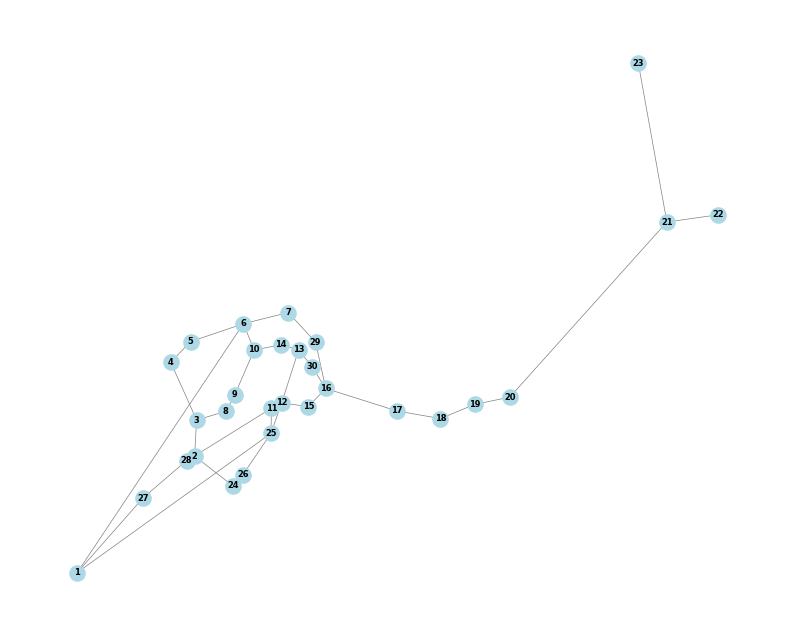

In [14]:
Gi_ = G0.copy()
Gi_.add_edges_from([(1,25),(1,6)])
draw_rotated_graph(Gi_)

In [15]:
#num_intersections = count_intersections(Gi_, node_data)
#print("Number of geometric intersections:", num_intersections)

# **I. Greedy Algorithm**

A transportation network design problem (TNDP) is formulated as bilevel optimisation problem.

\begin{align}
  \textbf{ULP}: \underset{y}{Minimise} \text{ }\quad  & \underset{}{T(y) = \sum_{(i,j)\in \Gamma \cup E}x^*_{i,j}t_{ij}(x^*_{i,j})}\\
   s.t\quad  & \sum_{}^{}c_{i,j}y_{i,j } \leq  B\\
   \quad & y_{i,j}\in\{0,1\}\\
   \quad & x^*_{i,j} = \text{arg min }F(x,f,y)\\
   \textbf{LLP}: \underset{x, f}{Minimise} \text{ }\quad & \underset{}{F(x,f,y) = \sum_{(i,j)\in \Gamma\cup E} \int_{0}^{x_{i,j}}t_{i,j}(w)dw}\\
   s.t\quad & x_{i,j}=\sum_{P_{r,s}\in E\cup \Gamma}\sum_{k\in P_{r,s}}f_k\delta_k^{i,j}\\
   \quad & \sum_{k\in P_{r,s}}f_k=d_{r,s}\\
   \quad & f_k\geq 0\\
   \quad & x_{i,j}\geq 0\\
   \quad & \delta_k^{i,j}\in \{0,1\}
\end{align}
where $y_{i,j}$ is a decision variable to add or remove an edge $(i,j)$, $x_{i,j}$ is the overall flow rate of the edge $(i,j)$, $f_k$ is the flow of a path $k$ in a given origin destination pair $(r,s)$ and $\delta_k^{i,j}$ a network structure variable that excludes a flow $f_k$ if it does not go through $x_{i,j}$.

The travel time function is typically given \cite{babazadeh2011application,koh2007solving,zhang2009bilevel} as
\begin{equation}
t(x) = t_{ij}(x_{ij}) = \alpha_{ij}+\beta_{ij}x_{ij}^4   
\end{equation}


<h3>Greedy Algorithm</h3>
In the problem of network augmentation, a greedy algorithm proposed can be used to iteratively identify a good candidate subset that will minimise $T(y)$ using a step-by-step greedy addition of local best links \cite{medya2018group}. The advantage of greedy algorithms is in providing stable, efficient and ``good'' solutions (see algorithm \ref{alg:greedy}).

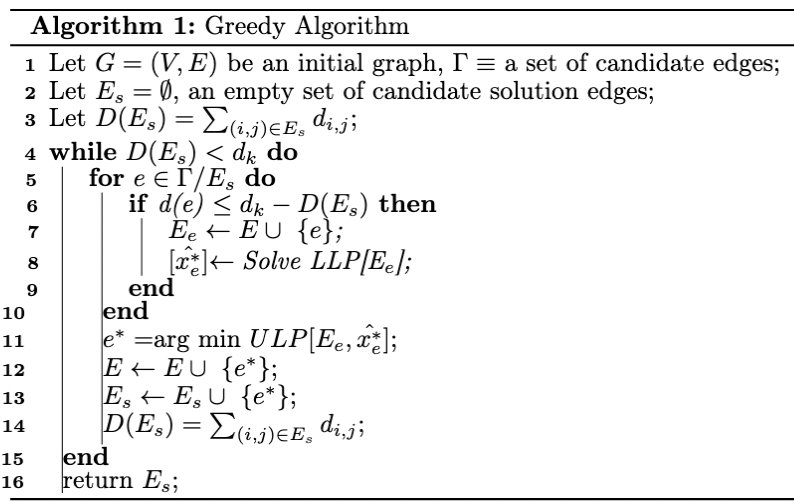

At each iteration, a sample candidate edge is selected from $\Gamma/E_s$ and added to a novel network $G_e$ with more edge additions. The edge that yields the best cost function minimisation is added to the candidate solution pool $E_s$, and as such, the network is updated, the candidate subset and termination constraint are updated. This process continues until a termination criterion is reached.

<h3>Lower Level Problem Solver</h3>

In [16]:
import pyomo.environ as pyo
import numpy as np
import math
import ast
import networkx as nx

#Var2Edge
def var2edge(edge_list,y_var):
    return [edge for edge,y_i in zip(edge_list,y_var) if y_i==1]

#Edge2Var
def edge2var(edge_list,edges_):
    ys = [1 if (i,j) in edges_ or (j,i) in edges_ else 0 for (i,j) in edge_list]
    return ys
    
#Travel time function
def travel_time_discrete(t0,alpha,x_ij,C=1000.0):
    return t0*(1 + alpha*(x_ij/C)**4)
    
def travel_time_integral(t0,alpha,x_ij,C=1000.0):
    return t0*(x_ij + 0.2*alpha*(x_ij**5)/(C**4))

#Lower Level Problem
def LLP_problem_solve(G_0, design_edges, 
                      OD_pairs, 
                      demand_paths, 
                      travel_t0, 
                      travel_alpha,
                      display=True,
                      solver_="ipopt"
                      ):

    Gi = G_0.copy() #New Design Network
    Gi.add_edges_from(design_edges) #Add edges to network

    """
    #get flow paths between root and destination
    def get_flow_paths(Gi,r,s):
      paths_ = list(nx.all_simple_paths(Gi,source=r,target=s))
      return [list(zip(path[:-1],path[1:])) for path in paths_]
    flow_paths = {(r,s): get_flow_paths(Gi,r,s)  for (r,s) in OD_pairs}
    """

    # Get flow paths between root and destination
    def get_flow_paths(Gi, r, s, k=5, weight=None):
        """
        Returns up to k shortest simple paths (instead of all simple paths).
        Much more efficient for large graphs.
        """
        gen = nx.shortest_simple_paths(Gi, source=r, target=s, weight=weight)
        paths_ = []
        for i, path in enumerate(gen):
            if i >= k:   # stop after k paths
                break
            paths_.append(list(zip(path[:-1], path[1:])))
        return paths_
    
    # Dictionary of OD flow paths
    flow_paths = {(r, s): get_flow_paths(Gi, r, s, k=5, weight="length") for (r, s) in OD_pairs}

    #Get flow dictionary: paths per (r,s)
    flow_dics = {} #flow dictionaries
    flow_vars_inds = []
    for fi in flow_paths:
      i = 0
      for path in flow_paths[fi]:
        flow_var = f'{fi}_%d'%(i+1)
        flow_dics[flow_var] =  path#store paths
        flow_vars_inds.append(flow_var)
        i+=1
    
    #flow demand rule
    def flow_demand_rule(problem,i,j):
      return sum(problem.f_k[str((i,j))+'_%d'%(ii+1)] for ii in range(len(flow_paths[i,j]))) == demand_paths[i,j]
    
    #flow - overall flow rule [link-path consistency]
    def flow_xij_rule(problem,i,j):
      expr = 0
      for key in flow_dics:
        path = flow_dics[key]
        if (i,j) in path or (j,i) in path:
          expr += problem.f_k[key]
      return expr==problem.x_ij[i,j]
    
    #Create Lower Level Problem
    LL_Trans_Problem = pyo.ConcreteModel()
    LL_Trans_Problem.x_ij = pyo.Var(Gi.edges(),within=pyo.NonNegativeReals) #continuous flow variables
    LL_Trans_Problem.f_k = pyo.Var(flow_vars_inds, within=pyo.NonNegativeReals) #Flow variables are rs-dependent
    LL_Trans_Problem.constraint_flow = pyo.Constraint(OD_pairs,rule=flow_demand_rule)#Flow Demand rule
    LL_Trans_Problem.constraint_flow_xij = pyo.Constraint(Gi.edges(),rule=flow_xij_rule)#Flow Xij rule
    #LL_Trans_Problem.obj = pyo.Objective(expr=sum(LL_Trans_Problem.x_ij[i,j]*travel_time_integral(travel_t0[i,j],travel_alpha[i,j],LL_Trans_Problem.x_ij[i,j]) for (i,j) in LL_Trans_Problem.x_ij))
    LL_Trans_Problem.obj = pyo.Objective(expr=sum(travel_time_integral(travel_t0[i,j],travel_alpha[i,j],LL_Trans_Problem.x_ij[i,j]) for (i,j) in LL_Trans_Problem.x_ij))

    pyo.SolverFactory(solver_).solve(LL_Trans_Problem,tee=display)

    if display:
        print('Number of x-variables: ',len(LL_Trans_Problem.x_ij),'\n')
    x_flows = {}
    for (i,j) in LL_Trans_Problem.x_ij:
        x_flows[i,j] = pyo.value(LL_Trans_Problem.x_ij[i,j])
        if display:
            print(f"x[{i},{j}] =",x_flows[i,j] )

    if display:
        print('Number of f-variables: ',len(LL_Trans_Problem.f_k),'\n')
    f_flows = {}
    for i in LL_Trans_Problem.f_k:
        f_flows[i] = pyo.value(LL_Trans_Problem.f_k[i])
        if display:
            print(f"f[{k}] =", pyo.value(LL_Trans_Problem.f_k[k]))

    L_opt = pyo.value(LL_Trans_Problem.obj)#optimal valur
    
    return L_opt, x_flows,f_flows

<h3>Lower Level Problem - Case Study</h3>

In [17]:
E_e = [(26,4)] #Design edges
L_opt, x_flows, f_flows = LLP_problem_solve(G0, 
                                            design_edges=E_e, 
                                            OD_pairs=OD_pairs, 
                                            demand_paths=demand_paths,
                                            travel_t0=travel_t0,
                                            travel_alpha=travel_alpha,
                                            display=False
                                           )


In [18]:
print("\n--- Results ---")
print("Objective =", L_opt)


--- Results ---
Objective = 2622.024058098539


In [19]:
print('Number of x-variables: ',len(x_flows),'\n')
for (i,j) in x_flows:
    print(f"x[{i},{j}] =",x_flows[i,j] )

Number of x-variables:  35 

x[13,30] = 195.66709002364968
x[3,4] = 99.14153596881886
x[16,29] = 186.4454482982123
x[16,17] = 265.7199999999995
x[7,29] = 181.94382759209768
x[12,13] = 114.60431879134849
x[21,22] = 66.05999999999997
x[8,9] = 85.62214761441159
x[12,25] = 103.38581543856708
x[17,18] = 141.22000000000014
x[2,11] = 145.91947319892836
x[27,28] = 203.69999999999996
x[25,26] = 90.62346633448458
x[13,14] = 129.55323003449013
x[1,27] = 203.69999999999996
x[18,19] = 141.22000000000014
x[4,5] = 122.88879130402425
x[5,6] = 109.04563320186561
x[12,15] = 130.38908046425348
x[4,26] = 90.62346633448458
x[9,10] = 99.18214773441161
x[10,14] = 158.97323015448973
x[19,20] = 66.05999999999997
x[6,7] = 194.99455022178742
x[11,25] = 12.76234872408684
x[15,16] = 186.3090808042529
x[2,28] = 203.69999999999996
x[6,10] = 136.0257582977631
x[16,30] = 135.52244873416166
x[21,23] = 0.0
x[20,21] = 66.05999999999997
x[3,8] = 84.62214751441158
x[2,3] = 153.8405257010718
x[11,12] = 133.1571243348459
x[2

In [20]:
print('Number of f-variables: ',len(f_flows),'\n')
for k in f_flows:
    print(f"f[{k}] =", f_flows[k])


Number of f-variables:  530 

f[(1, 2)_1] = 5.09
f[(1, 4)_1] = 2.54000004
f[(1, 4)_2] = -9.99999999700834e-09
f[(1, 4)_3] = -9.999999997799748e-09
f[(1, 4)_4] = -9.999999997657809e-09
f[(1, 4)_5] = -9.99999999917751e-09
f[(1, 5)_1] = 7.59000004
f[(1, 5)_2] = -9.99999999700834e-09
f[(1, 5)_3] = -9.999999995060632e-09
f[(1, 5)_4] = -9.999999997799748e-09
f[(1, 5)_5] = -9.999999998991248e-09
f[(1, 7)_1] = 10.103244470788612
f[(1, 7)_2] = -9.999999999558822e-09
f[(1, 7)_3] = 0.026755559211391628
f[(1, 7)_4] = -9.99999999700834e-09
f[(1, 7)_5] = -9.99999999873236e-09
f[(1, 9)_1] = 3.39000004
f[(1, 9)_2] = -9.999999998929091e-09
f[(1, 9)_3] = -9.999999998205736e-09
f[(1, 9)_4] = -9.999999998084956e-09
f[(1, 9)_5] = -9.999999998929091e-09
f[(1, 10)_1] = 10.130000040000004
f[(1, 10)_2] = -9.99999999873236e-09
f[(1, 10)_3] = -9.999999997575254e-09
f[(1, 10)_4] = -9.99999999873236e-09
f[(1, 10)_5] = -9.999999998660732e-09
f[(1, 12)_1] = 8.954399108767642
f[(1, 12)_2] = 0.8341250690897969
f[(1, 1

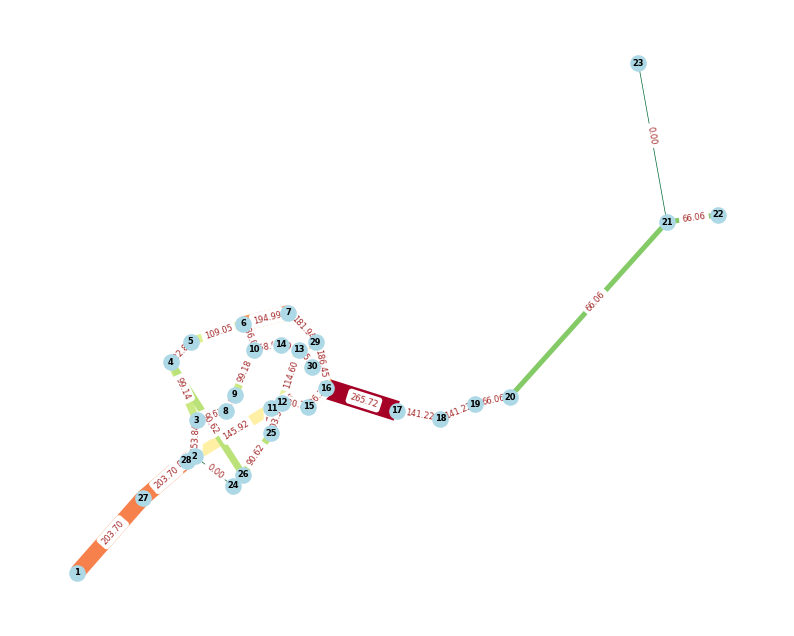

In [21]:
Gi = G0.copy()
Gi.add_edges_from(E_e)
draw_rotated_graph(Gi,edge_flows=x_flows)

<h3>Upper Level Problem</h3>

In [22]:
#--------------------------------------------------
def Upper_Level_Problem_obj_func(G0, 
                                y_vars=None, 
                                OD_pairs=OD_pairs, 
                                demand_paths=demand_paths,
                                travel_t0=travel_t0,
                                travel_alpha=travel_alpha,
                                cost_weights = cost_weights,
                                budget = 100,
                                penalty_factor = 1e9,
                                calib = CALIB,
                                complete_edge_vars=complete_edge_list,
                                free_design = True,
                                node_data = node_data,
                                display=False):
    
    E_e = [edge for edge,y_i in zip(complete_edge_vars,y_vars) if y_i== 1]#new design variables
    #print('E',E_e)
    #-- Solve the LLP problem
    L_opt, x_flows, f_flows = LLP_problem_solve(G0, 
                                            design_edges=E_e, 
                                            OD_pairs=OD_pairs, 
                                            demand_paths=demand_paths,
                                            travel_t0=travel_t0,
                                            travel_alpha=travel_alpha,
                                            display=display
                                           )
    #Solve the Objective Function
    obj_value = sum([x_flows[i,j]*travel_time_discrete(travel_t0[i,j],travel_alpha[i,j],x_flows[i,j]) for (i,j) in x_flows])
    penalty = max(0,sum([cost_weights[i,j] for (i,j) in E_e])-budget*calib)
    #print('penalty:', penalty)
    pure_cost = obj_value
    obj_value += penalty_factor*penalty
    if not free_design:
        Gi_ = G0.copy()
        Gi_.add_edges_from(E_e)
        cnt, inter = count_intersections_basic(Gi_, node_data)
        obj_value += cnt*penalty_factor*0.1
    
    return obj_value, x_flows, pure_cost



#------------------------------------------------ (Test Example) ----
y_vars = edge2var(complete_edge_list,[])
#---------------------------------------------------------------------
obj_value,x_flows,pure_cost = Upper_Level_Problem_obj_func(G0, 
                                y_vars=y_vars, 
                                OD_pairs=OD_pairs, 
                                demand_paths=demand_paths,
                                travel_t0=travel_t0,
                                travel_alpha=travel_alpha,
                                budget = Budget,
                                cost_weights = cost_weights,
                                complete_edge_vars=complete_edge_list,
                                free_design = optim_free_design,
                                node_data = node_data,
                                display=False)
                                         
print('\n\nUpper problem value:', obj_value)    



Upper problem value: 28928418830.831028


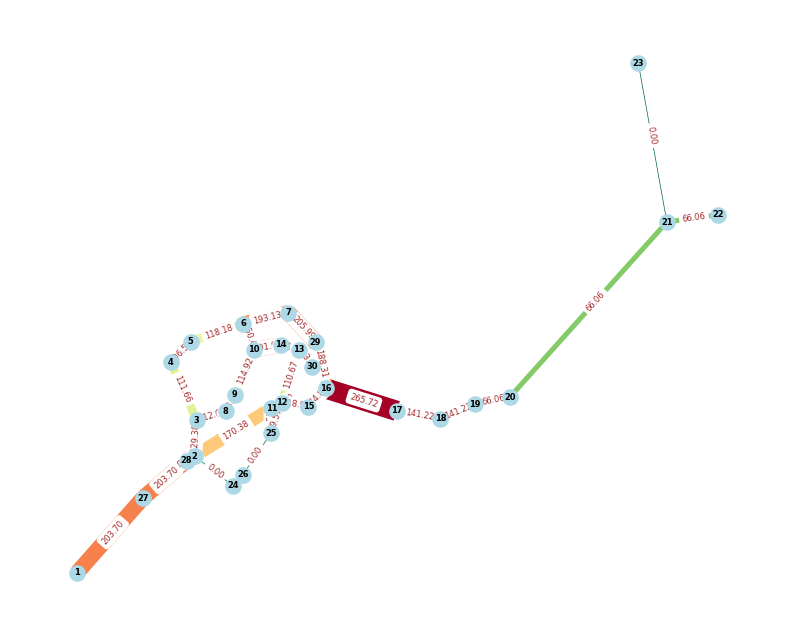

In [23]:
E_e = [edge for edge,y_i in zip(complete_edge_list,y_vars) if y_i== 1]
Gi = G0.copy()
Gi.add_edges_from(E_e)
draw_rotated_graph(Gi,edge_flows=x_flows)

In [24]:
def evaluate_upper_level(selected_edges, display=False):
    """
    Evaluate the Upper-Level Problem (ULP) given a list of selected edges only.
    
    Parameters
    ----------
    selected_edges : list of tuples
        Edges to add to the base network, e.g. [(26,4), (26,23)].
    display : bool, optional
        If True, prints progress and diagnostic details.

    Returns
    -------
    obj_value : float
        Objective value of the upper-level problem.
    x_flows : dict
        Flow solution from the lower-level problem.
    """

    # === Access or import the encapsulated parameters ===
    global G0, complete_edge_list, OD_pairs, demand_paths
    global travel_t0, travel_alpha, cost_weights, Budget, CALIB

    # --- Convert edge list to binary decision vector ---
    y_vars = [1 if e in selected_edges else 0 for e in complete_edge_list]

    # --- Evaluate the upper-level objective ---
    obj_value, x_flows, pure_cost = Upper_Level_Problem_obj_func(
        G0,
        y_vars=y_vars,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        budget=Budget,
        penalty_factor=1e9,
        calib=CALIB,
        complete_edge_vars=complete_edge_list,
        display=display,
        free_design = optim_free_design,
        node_data = node_data,
    )

    if display:
        print("Selected edges:", selected_edges)
        print(f"Upper-level objective value = {obj_value:.4f}")

    distance = 0
    for e in selected_edges:
        distance+= cost_weights[e]
        
    return obj_value, x_flows, pure_cost, distance/CALIB


In [25]:
def visualize_network(selected_edges, edge_flows=None, display=True):
    """
    Visualize the network for a given set of selected edges and optional flow data.

    Parameters
    ----------
    selected_edges : list of tuples
        Edges to be added to the base graph, e.g. [(26,4), (26,23)].
    edge_flows : dict, optional
        Dictionary of edge flow values (can be None).
    display : bool, optional
        If True, prints the number of edges and draws the graph.

    Returns
    -------
    Gi : networkx.Graph
        The updated network with selected edges added.
    """

    # Use global base graph (for simplicity)
    global G0

    Gi = G0.copy()
    Gi.add_edges_from(selected_edges)

    if display:
        print(f"Visualising network with {len(selected_edges)} added edges...")
        try:
            draw_rotated_graph(Gi, edge_flows=edge_flows)
        except Exception as e:
            print(f"⚠️ Could not draw graph: {e}")
    return Gi


<h3>Greedy Algorithm</h3>

In [26]:
import copy
import random

def greedy_upper_solver(G0, 
                        complete_edge_list, 
                        OD_pairs, 
                        demand_paths, 
                        travel_t0, 
                        travel_alpha, 
                        cost_weights, 
                        budget=100, 
                        penalty_factor=1e9, 
                        calib=CALIB, 
                        sampling_rate=0.2, 
                        free_design = True,
                        node_data = node_data,
                        display=False):
    """
    Greedy solver for the Upper Level Problem (ULP) with optional edge sampling.
    
    Parameters
    ----------
    G0 : networkx.Graph
        Initial graph.
    complete_edge_list : list
        List of all possible candidate edges.
    OD_pairs : list
        Origin-destination pairs.
    demand_paths : dict
        Precomputed demand paths.
    travel_t0, travel_alpha : dict
        Travel time parameters.
    cost_weights : dict
        Edge construction costs.
    budget : float
        Total budget constraint.
    penalty_factor : float
        Penalty factor for infeasible solutions.
    calib : float
        Calibration factor for scaling budget.
    sampling_rate : float
        Fraction (0 < sampling_rate ≤ 1) of candidate edges to evaluate at each step.
        Example: 0.2 means only 20% of candidate edges are tested.
    display : bool
        If True, prints iteration details.
    """

    # Candidate solution edges
    E_s = []
    total_cost = 0.0
    best_obj, best_flows = None, None

    iter_history = {
        "edges":[],
        "obj":[],
        "flows":[]
    }
    
    while total_cost < budget * calib:
        candidate_edge = None
        candidate_obj = float("inf")
        candidate_flows = None

        # Build reduced candidate set by sampling
        remaining_edges = [e for e in complete_edge_list if e not in E_s and e not in G0.edges()]
        if not remaining_edges:
            break

        sample_size = max(1, int(len(remaining_edges) * sampling_rate))
        sampled_edges = random.sample(remaining_edges, sample_size)

        # For each sampled candidate edge
        for e in sampled_edges:
            edge_cost = cost_weights[e]
            if edge_cost > budget * calib - total_cost:
                continue  # cannot fit in remaining budget
            
            # Build trial solution (E_s ∪ {e})
            y_trial = [1 if edge in E_s+[e] else 0 for edge in complete_edge_list]
            
            # Solve LLP and evaluate ULP objective
            obj_val, flows, pure_cost = Upper_Level_Problem_obj_func(
                G0,
                y_vars=y_trial,
                OD_pairs=OD_pairs,
                demand_paths=demand_paths,
                travel_t0=travel_t0,
                travel_alpha=travel_alpha,
                cost_weights=cost_weights,
                budget=budget,
                penalty_factor=penalty_factor,
                calib=calib,
                complete_edge_vars=complete_edge_list,
                free_design = free_design,
                node_data = node_data,
                display=False
            )
            
            # Keep best candidate
            if obj_val < candidate_obj:
                candidate_obj = obj_val
                candidate_edge = e
                candidate_flows = flows
        
        # If no feasible edge found → break
        if candidate_edge is None:
            break
        
        # Commit to best edge e*
        E_s.append(candidate_edge)
        total_cost += cost_weights[candidate_edge]
        best_obj = candidate_obj
        best_flows = candidate_flows

        iter_history["obj"].append(best_obj)
        iter_history["flows"].append(best_flows.copy())
        
        if display:
            print(f"Added edge {candidate_edge}, Obj={best_obj:.4f}, Cost={total_cost:.2f}")
            
    iter_history["edges"] = E_s.copy()
    
    return E_s, best_obj, best_flows,iter_history

In [27]:
bool_result_exist = True

if not bool_result_exist:
    start_greedy = time.time()
    greedy_chosen_edges, greedy_best_obj, greedy_best_flows,greedy_iter_history = greedy_upper_solver(
        G0,
        complete_edge_list,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        budget=Budget,
        calib=CALIB,
        sampling_rate = 1,
        free_design = optim_free_design,
        node_data = node_data,
        display=True
    )
    
    stop_greedy = time.time()
    elapsed_greedy = (stop_greedy - start_greedy)/60
    print("\nGreedy Chosen edges:", greedy_chosen_edges)
    print("Final objective:", greedy_best_obj)
    print(f"Elapsed time: {elapsed_greedy:.4f} minutes")
else:

    if optim_free_design:
        greedy_chosen_edges = [(7, 17), (1, 26), (19, 29), (7, 30), (24, 29), (1, 14), (13, 19), (5, 29), (2, 30), (1, 6), (22, 25), (8, 29), (17, 30), (13, 29)]
        #Final objective: 66348.36500373315
        elapsed_greedy = 27.3416 #minutes
    else:
        greedy_chosen_edges = [(7, 17), (1, 3), (7, 30), (17, 29), (16, 24), (6, 23), (1, 17), (2, 13), (1, 2), (7, 19), (12, 30), (29, 30), (10, 13), (5, 10), (15, 30), (2, 25), (17, 19), (9, 13), (15, 25), (24, 26), (13, 29)]
        #Final objective: 10102039.030624228
        elapsed_greedy = 29.5065 #minutes
    y_vars = edge2var(complete_edge_list,greedy_chosen_edges)
    greedy_iter_history = []
    greedy_best_obj, greedy_best_flows, best_pure_cost = Upper_Level_Problem_obj_func(
        G0,
        y_vars=y_vars,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        budget=Budget,
        penalty_factor=1e9,
        calib=CALIB,
        complete_edge_vars=complete_edge_list,
        free_design = optim_free_design,
        node_data = node_data,
        display=display
    )


Ipopt 3.14.19: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.19, running with linear solver MUMPS 5.8.1.

Number of nonzeros in equality constraint Jacobian...:     2639
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       55

Total number of variables............................:      625
                     variables with only lower bounds:      625
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      169
Total number

In [28]:
print("\nGreedy Chosen edges:", greedy_chosen_edges)
print("Final objective:", greedy_best_obj)
print(f"Elapsed time: {elapsed_greedy:.4f} minutes")


Greedy Chosen edges: [(7, 17), (1, 3), (7, 30), (17, 29), (16, 24), (6, 23), (1, 17), (2, 13), (1, 2), (7, 19), (12, 30), (29, 30), (10, 13), (5, 10), (15, 30), (2, 25), (17, 19), (9, 13), (15, 25), (24, 26), (13, 29)]
Final objective: 418773710.6184962
Elapsed time: 29.5065 minutes


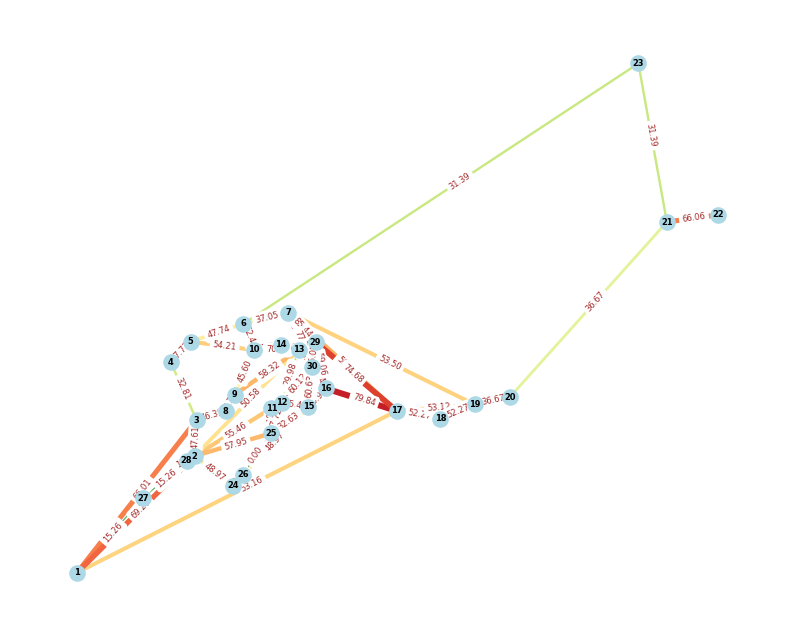

In [29]:
Gi = G0.copy()
Gi.add_edges_from(greedy_chosen_edges)
draw_rotated_graph(Gi,edge_flows=greedy_best_flows)

<h3>Tabu Search</h3>

In [30]:
import copy
import random
import math

# ===============================================================
# === Helper Functions ==========================================
# ===============================================================

def euclidean_distance(p1, p2):
    """Compute Euclidean distance between two coordinate pairs (lat, lon)."""
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)


def nearest_nodes(node_data, target_node, k=3, exclude_self=True):
    """Return top-k nearest nodes to 'target_node' based on Euclidean distance."""
    target_pos = node_data[target_node]["pos"]
    distances = []
    for nid, data in node_data.items():
        if exclude_self and nid == target_node:
            continue
        dist = euclidean_distance(target_pos, data["pos"])
        distances.append((nid, dist))
    distances.sort(key=lambda x: x[1])
    return [nid for nid, _ in distances[:k]]


def generate_spatial_neighbours(edge, node_data, k=3):
    """
    Generate candidate neighbour edges for a given edge (a,b)
    following Yves' three spatial rules:
      1. (a,b) → (a,y)  where y near b
      2. (a,b) → (x,b)  where x near a
      3. (a,b) → (x,y)  where x near a and y near b
    """
    a, b = edge
    candidates = set()

    nearest_a = nearest_nodes(node_data, a, k=k)
    nearest_b = nearest_nodes(node_data, b, k=k)

    # Rule 1: replace b with y near b
    for y in nearest_b:
        if y != a:
            candidates.add(tuple(sorted((a, y))))

    # Rule 2: replace a with x near a
    for x in nearest_a:
        if x != b:
            candidates.add(tuple(sorted((x, b))))

    # Rule 3: replace both ends
    for x in nearest_a:
        for y in nearest_b:
            if x != y:
                candidates.add(tuple(sorted((x, y))))

    return list(candidates)


# ===============================================================
# === Tabu Search ===============================================
# ===============================================================

def tabu_search_ul(
    G0,
    node_data,
    complete_edge_list,
    OD_pairs,
    demand_paths,
    travel_t0,
    travel_alpha,
    cost_weights,
    initial_edges=None,        # ← now optional
    initial_obj=None,
    initial_flows=None,
    budget=100,
    penalty_factor=1e9,
    calib=1.0,
    max_iter=50,
    tabu_tenure=5,
    neigh_size=10,
    top_k=3,
    display=False,
    free_design = optim_free_design
):
    """
    Spatial Tabu Search for the Upper Level Problem (ULP)
    -----------------------------------------------------
    If `initial_edges` is None, start with an empty (or greedy-feasible)
    edge set satisfying the budget constraint.
    """

    # ====================================================
    # === INITIALISATION ================================
    # ====================================================

    if initial_edges is None:
        # --- Greedy-feasible initialisation ---
        Bcap = budget * calib
        edges = []
        total_cost = 0.0

        remaining = [e for e in complete_edge_list if e not in G0.edges()]
        random.shuffle(remaining)
        for e in remaining:
            c = cost_weights[e]
            if total_cost + c <= Bcap:
                edges.append(e)
                total_cost += c

        y_trial = [1 if e in edges else 0 for e in complete_edge_list]
        obj_val, flows, pure_cost = Upper_Level_Problem_obj_func(
            G0,
            y_vars=y_trial,
            OD_pairs=OD_pairs,
            demand_paths=demand_paths,
            travel_t0=travel_t0,
            travel_alpha=travel_alpha,
            cost_weights=cost_weights,
            budget=budget,
            penalty_factor=penalty_factor,
            calib=calib,
            complete_edge_vars=complete_edge_list,
            display=False,
            free_design = optim_free_design,
            node_data = node_data
        )

        current_edges = edges
        current_obj = obj_val
        current_flows = flows

        if display:
            print(f"[Init] Started with greedy-feasible network |E|={len(edges)} Obj={obj_val:.4f}")

    else:
        # --- Use provided initial solution ---
        current_edges = copy.deepcopy(initial_edges)
        current_obj = initial_obj
        current_flows = copy.deepcopy(initial_flows)

        if display:
            print(f"[Init] Started from user-specified edges |E|={len(current_edges)} Obj={current_obj:.4f}")

    # --- Set best as current initially ---
    best_edges = copy.deepcopy(current_edges)
    best_obj = current_obj
    best_flows = copy.deepcopy(current_flows)

    tabu_list = {}  # {move: expiry_iteration}

    iter_history = {
        "edges": [],
        "obj": [],
        "flows": []
    }

    # ====================================================
    # === MAIN LOOP =====================================
    # ====================================================

    for iteration in range(1, max_iter + 1):
        best_neigh_obj = float("inf")
        best_neigh_edges = None
        best_neigh_flows = None
        best_move = None

        for _ in range(neigh_size):
            if not current_edges:
                break

            edge_to_replace = random.choice(current_edges)
            candidate_edges = generate_spatial_neighbours(edge_to_replace, node_data, k=top_k)
            if not candidate_edges:
                continue

            new_edge = random.choice(candidate_edges)
            move = (edge_to_replace, new_edge)

            # Skip if tabu (unless aspiration)
            if move in tabu_list and tabu_list[move] > iteration:
                continue

            # Build new neighbourhood
            neigh_edges = [e for e in current_edges if e != edge_to_replace]
            if new_edge not in neigh_edges:
                neigh_edges.append(new_edge)

            # Evaluate neighbour
            y_trial = [1 if e in neigh_edges else 0 for e in complete_edge_list]
            obj_val, flows, pure_cost = Upper_Level_Problem_obj_func(
                G0,
                y_vars=y_trial,
                OD_pairs=OD_pairs,
                demand_paths=demand_paths,
                travel_t0=travel_t0,
                travel_alpha=travel_alpha,
                cost_weights=cost_weights,
                budget=budget,
                penalty_factor=penalty_factor,
                calib=calib,
                complete_edge_vars=complete_edge_list,
                display=False
            )

            # Aspiration criterion
            if obj_val < best_obj:
                tabu_list.pop(move, None)

            # Track best neighbour
            if obj_val < best_neigh_obj:
                best_neigh_obj = obj_val
                best_neigh_edges = neigh_edges
                best_neigh_flows = flows
                best_move = move

        # --- Handle no valid neighbour ---
        if best_neigh_edges is None:
            if display:
                print(f"Iteration {iteration}: No admissible neighbour found.")
            break

        # --- Update current state ---
        current_edges = best_neigh_edges
        current_obj = best_neigh_obj
        current_flows = best_neigh_flows

        # --- Update tabu list ---
        if best_move:
            tabu_list[best_move] = iteration + tabu_tenure

        # --- Global best update ---
        if current_obj < best_obj:
            best_obj = current_obj
            best_edges = copy.deepcopy(current_edges)
            best_flows = copy.deepcopy(current_flows)

        # --- Display iteration ---
        if display:
            print(f"Iter {iteration:02d}: Obj={current_obj:.4f}, Best={best_obj:.4f}, Tabu={len(tabu_list)}")
            Gi = G0.copy()
            Gi.add_edges_from(current_edges)
            try:
                draw_rotated_graph(Gi, edge_flows=current_flows)
            except Exception:
                pass

        # --- Log progress ---
        iter_history["edges"].append(best_edges.copy())
        iter_history["obj"].append(best_obj)
        iter_history["flows"].append(best_flows.copy())

    if display:
        print(f"[Done] Best objective = {best_obj:.4f} after {iteration} iterations.")

    return best_edges, best_obj, best_flows, iter_history


<h3>Tabu Specific Configuration</h3>

In [31]:
optim_tabu_tenure = 10


=== Greedy Solution ===
Initial edges selected: [(7, 17), (1, 3), (7, 30), (17, 29), (16, 24), (6, 23), (1, 17), (2, 13), (1, 2), (7, 19), (12, 30), (29, 30), (10, 13), (5, 10), (15, 30), (2, 25), (17, 19), (9, 13), (15, 25), (24, 26), (13, 29)]
Initial objective value: 418773710.6184962
[Init] Started with greedy-feasible network |E|=14 Obj=9981302256.3528
Iter 01: Obj=6742541471.5180, Best=6742541471.5180, Tabu=1


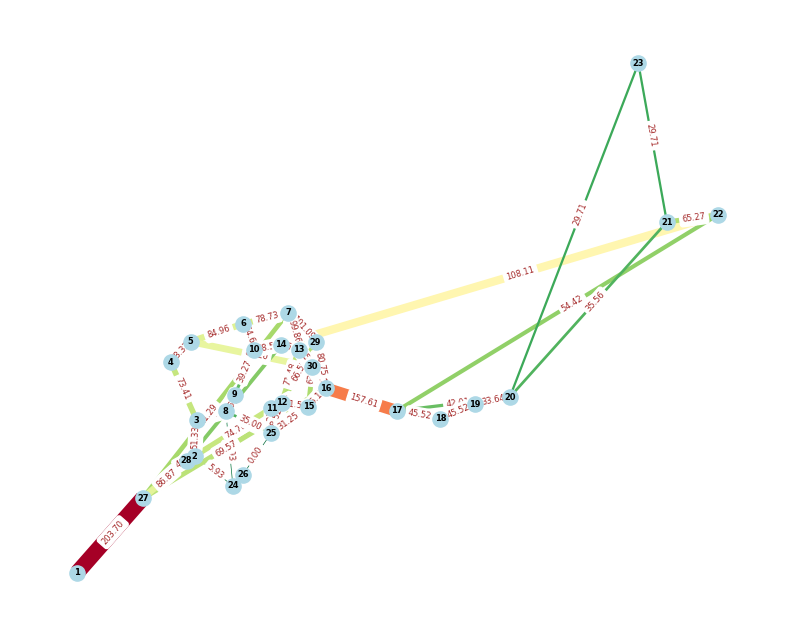

[Done] Best objective = 6742541471.5180 after 1 iterations.

=== Tabu Search Result ===
Best edges selected: [(5, 30), (7, 13), (12, 29), (7, 27), (8, 25), (20, 23), (16, 27), (14, 22), (8, 24), (15, 29), (14, 28), (17, 20), (15, 25), (17, 22)]
Best objective value: 6742541471.518048
Tabu Elapsed Time: 0.1775321841239929 minutes


In [32]:
initial_chosen_edges = greedy_chosen_edges#[]
initial_best_obj = greedy_best_obj #float("inf")
initial_flows = greedy_best_flows #[]
print("\n=== Greedy Solution ===")
print("Initial edges selected:", initial_chosen_edges)
print("Initial objective value:", initial_best_obj)
#greedy_chosen_edges, greedy_best_obj, greedy_best_flows 
#---------
elapsed_tabu_list = []
tabu_best_edges_list = []
tabu_best_obj_list = []
tabu_best_flows_list = []
tabu_iter_history_list= []
#------------------------------------------------------------------------------
start_tabu = time.time()

# ===   Run Tabu Search (Starting from Greedy Solution) ===
tabu_best_edges, tabu_best_obj, tabu_best_flows,tabu_iter_history = tabu_search_ul(
    G0=G0,
    complete_edge_list=complete_edge_list,
    OD_pairs=OD_pairs,
    demand_paths=demand_paths,
    travel_t0=travel_t0,
    travel_alpha=travel_alpha,
    cost_weights=cost_weights,
    initial_edges=None,        # from Greedy solver
    initial_obj=None,
    initial_flows=None,
    node_data = node_data,
    budget=100,
    penalty_factor=penalty_factor,
    calib=CALIB,
    max_iter=optim_max_iter,        # total iterations
    tabu_tenure=5,      # how long a move stays tabu
    neigh_size=optim_pop_size,      # number of neighbour moves to test per iteration
    display=True,
    free_design = optim_free_design
)


stop_tabu = time.time()
elapsed_tabu = (stop_tabu - start_tabu)/60

elapsed_tabu_list.append(elapsed_tabu)
tabu_best_edges_list.append(tabu_best_edges.copy())
tabu_best_obj_list.append(tabu_best_obj)
tabu_best_flows_list.append(tabu_best_flows.copy())
tabu_iter_history_list.append(tabu_iter_history.copy())

# ===  Display Results ===
print("\n=== Tabu Search Result ===")
print("Best edges selected:", tabu_best_edges)
print("Best objective value:", tabu_best_obj)
print("Tabu Elapsed Time:", elapsed_tabu, "minutes")


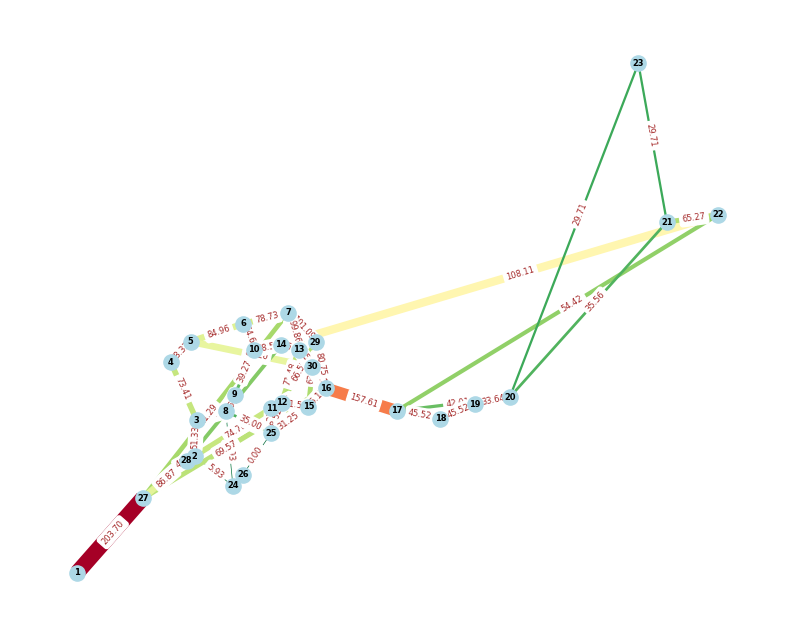

In [33]:
Gi = G0.copy()
Gi.add_edges_from(tabu_best_edges)
draw_rotated_graph(Gi,edge_flows=tabu_best_flows)

<h4>Tabu Search Multiple Restarts</h4>

In [34]:
for i in range(n_runs):
    print('Tabu run number %d...'%(i+1))
    #------------------------------------------------------------------------------
    start_tabu = time.time()
    
    # ===   Run Tabu Search (Starting from Greedy Solution) ===
    tabu_best_edges, tabu_best_obj, tabu_best_flows,tabu_iter_history = tabu_search_ul(
        G0=G0,
        complete_edge_list=complete_edge_list,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        initial_edges=None,        # from Greedy solver
        initial_obj=None,
        initial_flows=None,
        node_data = node_data,
        budget=100,
        penalty_factor=penalty_factor,
        calib=CALIB,
        max_iter=optim_max_iter,        # total iterations
        tabu_tenure=optim_tabu_tenure,      # how long a move stays tabu
        neigh_size=optim_pop_size,      # number of neighbour moves to test per iteration
        display=False,
        free_design = optim_free_design
    )
    
    
    stop_tabu = time.time()
    elapsed_tabu = (stop_tabu - start_tabu)/60
    
    elapsed_tabu_list.append(elapsed_tabu)
    tabu_best_edges_list.append(tabu_best_edges.copy())
    tabu_best_obj_list.append(tabu_best_obj)
    tabu_best_flows_list.append(tabu_best_flows.copy())
    tabu_iter_history_list.append(tabu_iter_history.copy())

    print("\n=== Tabu Search Result ===")
    print("Best edges selected:", tabu_best_edges)
    print("Best objective value:", tabu_best_obj)
    print("Tabu Elapsed Time:", elapsed_tabu, "minutes")
    

print('Tabu search multiple runs complete...')

Tabu run number 1...

=== Tabu Search Result ===
Best edges selected: [(5, 11), (23, 28), (18, 25), (4, 17), (21, 28), (4, 27), (13, 23), (1, 24), (24, 26), (17, 30)]
Best objective value: 4967024001.506761
Tabu Elapsed Time: 0.40561185280481976 minutes
Tabu run number 2...

=== Tabu Search Result ===
Best edges selected: [(15, 17), (8, 28), (26, 27), (10, 30), (9, 11), (20, 27), (3, 25), (17, 25), (12, 28), (2, 16), (9, 19), (14, 21), (3, 5), (9, 28), (12, 27), (15, 24), (14, 30), (2, 29), (8, 26), (12, 30), (11, 29)]
Best objective value: 5392526825.955957
Tabu Elapsed Time: 1.2793541193008422 minutes
Tabu run number 3...

=== Tabu Search Result ===
Best edges selected: [(15, 24), (4, 25), (25, 29), (4, 29), (4, 12), (5, 30), (9, 19), (18, 26), (9, 21), (19, 21), (6, 29), (13, 28), (15, 25), (6, 20)]
Best objective value: 8010084759.332021
Tabu Elapsed Time: 2.2905181129773458 minutes
Tabu run number 4...

=== Tabu Search Result ===
Best edges selected: [(16, 21), (15, 20), (10, 22),

In [35]:
ts_solution_pack = {
    "optim_name": "TS",
    "desc": "no intersection to objective function",
    "n_sol": n_runs+1,
    "optim_time" : elapsed_tabu_list,
    "settings" : [{"optim_max_iter":optim_max_iter,"sampling_rate":1, "tabu_tenure":optim_tabu_tenure,"neigh_size":optim_pop_size, "free_design":optim_free_design}],
    "solutions" : tabu_best_edges_list,
    "obj_vals" : tabu_best_obj_list,
    "flows" : tabu_best_flows_list,
    "iter_history" : tabu_iter_history_list
}

from joblib import dump, load
from datetime import datetime
timestamp = datetime.now().strftime("%d_%m_%Y_%H_%M_%S")
tabu_title  = "../../output/results/constrained/rv1/no_init_tabu_results_%s.joblib"%timestamp

dump(ts_solution_pack, tabu_title)
print(tabu_title,"saved....")

../../output/results/constrained/rv1/no_init_tabu_results_26_02_2026_23_17_04.joblib saved....


In [36]:
print("\n=== TABU SEARCH MULTI-RUN SUMMARY ===")
print(f"Average objective: {np.mean(tabu_best_obj_list):.4f}")
print(f"Best objective: {np.min(tabu_best_obj_list):.4f}")
print(f"Average runtime: {np.mean(elapsed_tabu_list):.4f} minutes")
print(f"Std. deviation of objective: {np.std(tabu_best_obj_list):.4f}")


=== TABU SEARCH MULTI-RUN SUMMARY ===
Average objective: 5996424643.6909
Best objective: 1231921482.4764
Average runtime: 1.7489 minutes
Std. deviation of objective: 3307704754.4816
